<a href="https://colab.research.google.com/github/mariajuliapessoa/Analise-Dijkstra/blob/main/Djikstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o CSV do Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset Teoria - Sheet1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
print(df.head())

   Vértices Linguagem  Execução  Tempo Médio  Desvio Padrão  Densidade
0       100    Python         1     0.000158       0.000015       0.05
1       100    Python         1     0.000240       0.000018       0.10
2       100    Python         1     0.000528       0.000140       0.20
3       100    Python         1     0.000621       0.000074       0.40
4       100         C         1     0.000102       0.000013       0.05


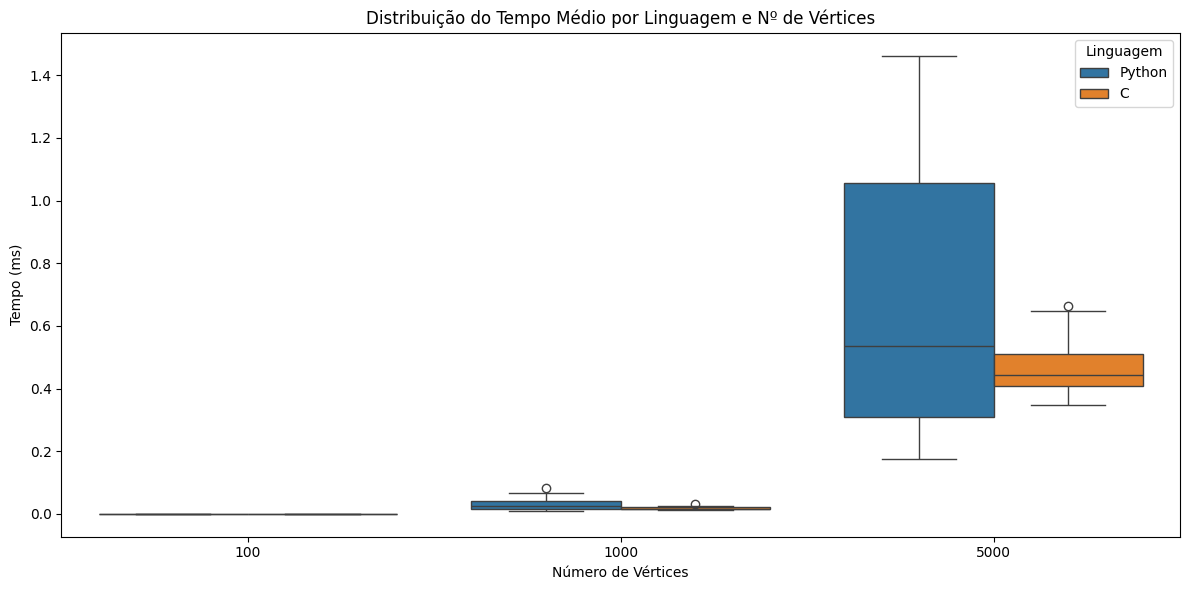

In [3]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="Vértices",
    y="Tempo Médio",
    hue="Linguagem"
)
plt.title("Distribuição do Tempo Médio por Linguagem e Nº de Vértices")
plt.ylabel("Tempo (ms)")
plt.xlabel("Número de Vértices")
plt.legend(title="Linguagem")
plt.tight_layout()
plt.show()

<ipython-input-4-b77c55f5c388>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


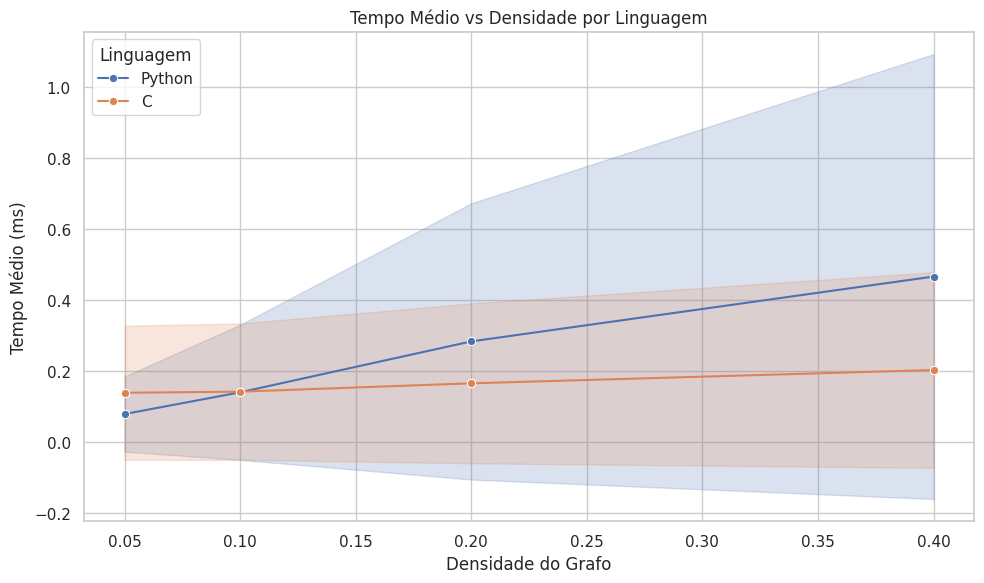

In [4]:
sns.set(style="whitegrid")

# Plotando gráfico de linha do Tempo Médio em função da Densidade, por Linguagem
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='Densidade',
    y='Tempo Médio',
    hue='Linguagem',
    marker='o',
    ci='sd'  # mostra intervalo de confiança com base no desvio padrão
)

plt.title('Tempo Médio vs Densidade por Linguagem')
plt.xlabel('Densidade do Grafo')
plt.ylabel('Tempo Médio (ms)')
plt.legend(title='Linguagem')
plt.tight_layout()
plt.show()


   Linguagem  Vértices  Densidade  Tempo Médio
0          C       100       0.05       0.1001
1          C       100       0.10       0.1313
2          C       100       0.20       0.1461
3          C       100       0.40       0.1935
12    Python       100       0.05       0.1948
13    Python       100       0.10       0.2838
14    Python       100       0.20       0.5125
15    Python       100       0.40       0.7702


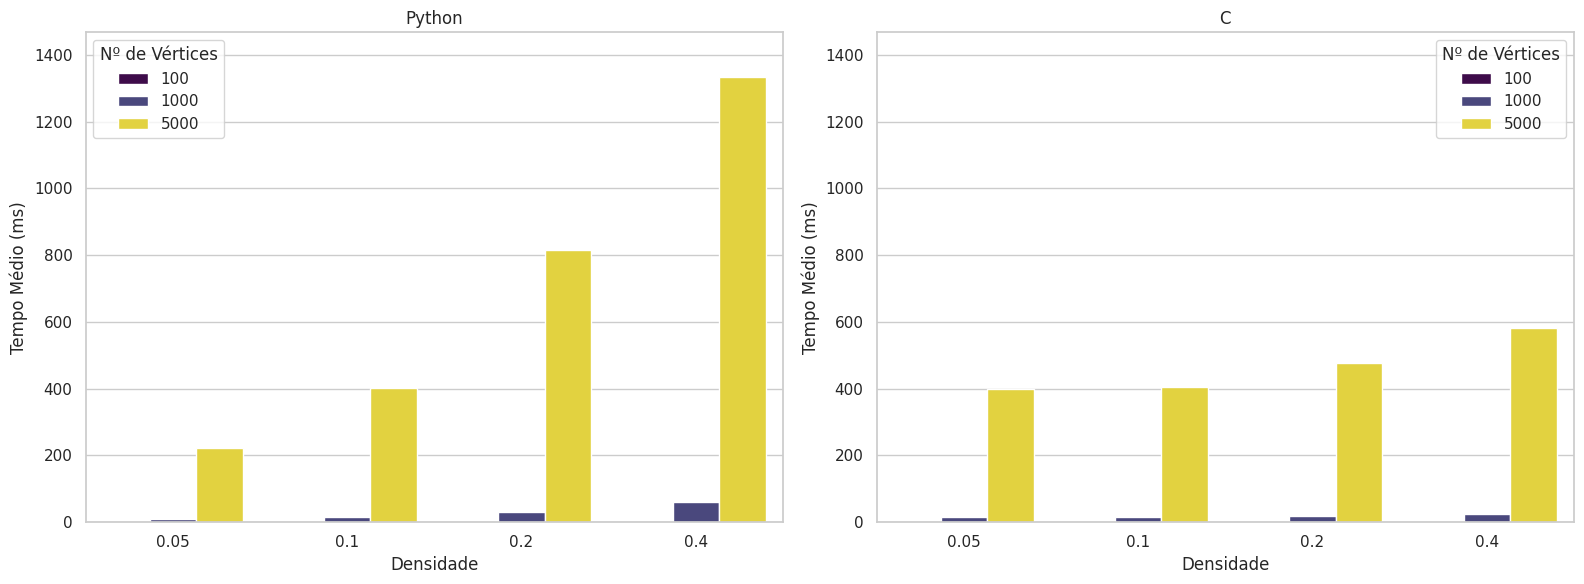

In [5]:
# Arredondar densidade para evitar problemas de precisão binária
df['Densidade'] = df['Densidade'].round(2)

df['Tempo Médio'] = df['Tempo Médio'] * 1000   # converter segundos para milissegundos

# Agrupamento por linguagem, vértices e densidade
df_grouped = df.groupby(['Linguagem', 'Vértices', 'Densidade'])['Tempo Médio'].mean().reset_index()

# Estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Gráficos lado a lado por linguagem
for i, lang in enumerate(['Python', 'C'], start=1):
    ax = plt.subplot(1, 2, i)
    data = df_grouped[df_grouped['Linguagem'] == lang]

    sns.barplot(
        data=data,
        x='Densidade',
        y='Tempo Médio',
        hue='Vértices',
        palette='viridis',
        ax=ax
    )

    ax.set_title(f'{lang}')
    ax.set_ylabel('Tempo Médio (ms)')
    ax.set_xlabel('Densidade')
    ax.legend(title='Nº de Vértices')
    ax.set_ylim(0, df_grouped['Tempo Médio'].max() * 1.1)

print(df_grouped[df_grouped['Vértices'] == 100])

plt.tight_layout()
plt.show()


Vértices  Linguagem
100       C            40
          Python       40
1000      C            40
          Python       40
5000      C            40
          Python       40
dtype: int64


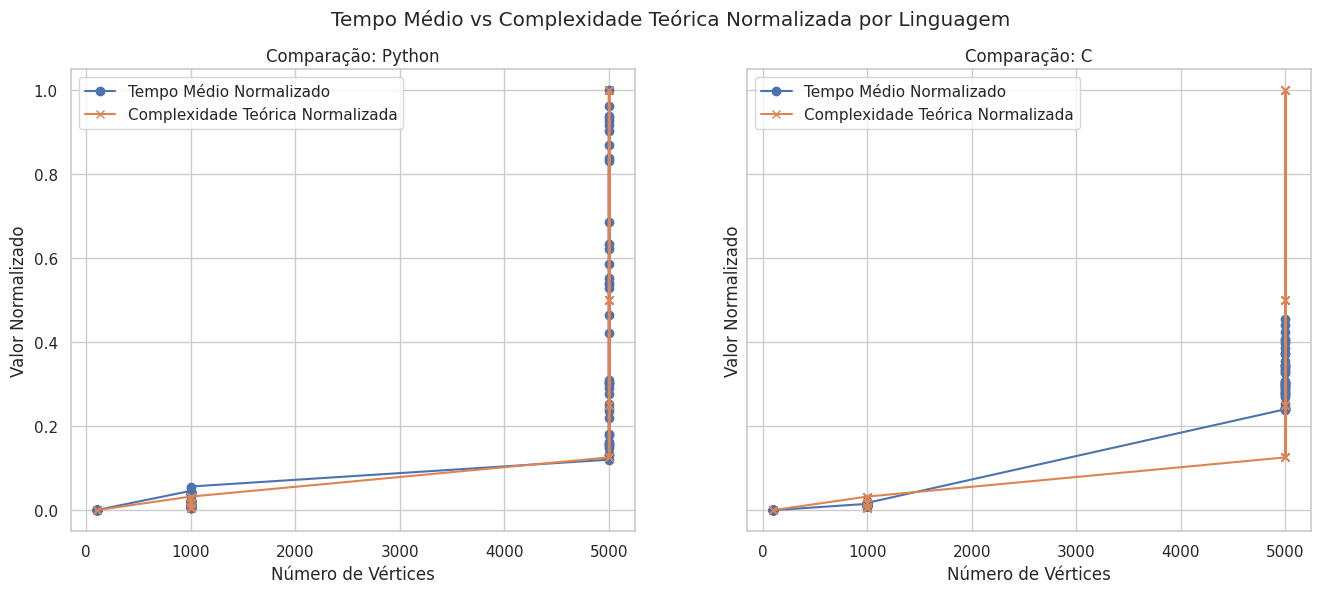

In [13]:
# calculo do número de arestas E = densidade * V*(V-1)/2
df['E'] = df['Densidade'] * (df['Vértices'] * (df['Vértices'] - 1)) / 2

# para V=0 ou V=1, log V não é definido, então substituímos por 1 para evitar erros
df['logV'] = np.log(df['Vértices'].replace(0, 1))
df['Complexidade Teórica'] = (df['Vértices'] + df['E']) * df['logV']

# normaliza a complexidade (escala 0-1)
df['Complexidade Normalizada'] = (df['Complexidade Teórica'] - df['Complexidade Teórica'].min()) / \
                                 (df['Complexidade Teórica'].max() - df['Complexidade Teórica'].min())

# normaliza o tempo médio
df['Tempo Normalizado'] = (df['Tempo Médio'] - df['Tempo Médio'].min()) / (df['Tempo Médio'].max() - df['Tempo Médio'].min())

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, lang in enumerate(['Python', 'C']):
    df_lang = df[df['Linguagem'] == lang].sort_values(by='Vértices')

    axes[i].plot(df_lang['Vértices'], df_lang['Tempo Normalizado'], marker='o', label='Tempo Médio Normalizado')
    axes[i].plot(df_lang['Vértices'], df_lang['Complexidade Normalizada'], marker='x', label='Complexidade Teórica Normalizada')

    axes[i].set_title(f'Comparação: {lang}')
    axes[i].set_xlabel('Número de Vértices')
    axes[i].set_ylabel('Valor Normalizado')
    axes[i].legend()
    axes[i].grid(True)


plt.suptitle('Tempo Médio vs Complexidade Teórica Normalizada por Linguagem')
plt.show()


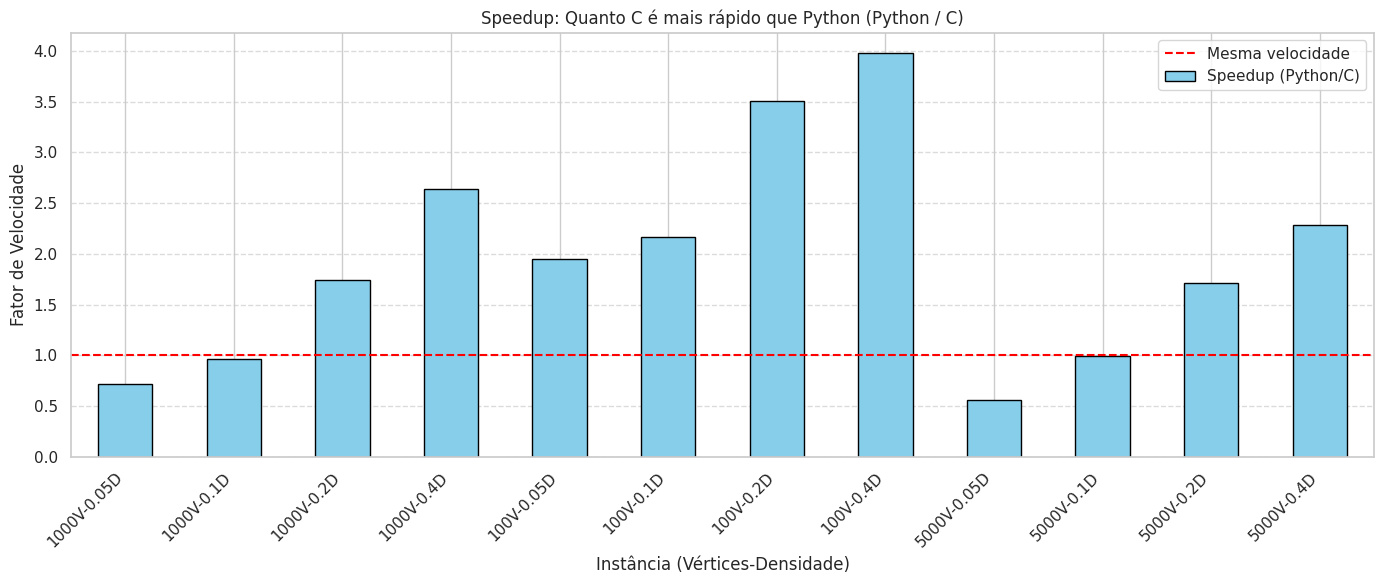

In [7]:
df['Vértices'] = df['Vértices'].astype(int)
df['Tempo Médio'] = df['Tempo Médio'].astype(float)

# Cria uma coluna que representa cada instância (única combinação de vértices e densidade)
df['Instância'] = df['Vértices'].astype(str) + 'V-' + df['Densidade'].astype(str) + 'D'

pivot = df.pivot_table(index='Instância', columns='Linguagem', values='Tempo Médio')
pivot['Speedup (Python/C)'] = pivot['Python'] / pivot['C']

plt.figure(figsize=(14, 6))
pivot['Speedup (Python/C)'].plot(kind='bar', color='skyblue', edgecolor='black')

plt.axhline(1, color='red', linestyle='--', label='Mesma velocidade')
plt.title('Speedup: Quanto C é mais rápido que Python (Python / C)')
plt.ylabel('Fator de Velocidade')
plt.xlabel('Instância (Vértices-Densidade)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()